### 0. Dependencies

In [1]:
# Built-In Dependencies
import helpers
import numpy as np
import os
import random
import sys
import time

# Image Processing Dependencies
import cv2
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

# Deep Learning Framework Dependecies
from keras.preprocessing.image import *
import mxnet as mx
from mxnet.io import DataIter
from mxnet.io import DataBatch

# External Dependencies
from symbol_CDCNN import CDCNN
from SegmentationLoss import SegmentationLoss

# Version
print "Python:", sys.version
print "opencv:", cv2.__version__
print "keras:", mx.__version__
print "mxnet:", mx.__version__

Using TensorFlow backend.


Python: 2.7.12 |Anaconda 2.4.0 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]
opencv: 2.4.11
keras: 0.11.0
mxnet: 0.11.0


### 1.1 Conv-Deconv Neural Network (no skip connections)

In [5]:
CDNN(short_skip=False, long_skip=False)

Stage1_Input: [(1L, 3L, 256L, 256L)]
Stage1D_conv1: [(1L, 32L, 256L, 256L)]
Stage1D_conv2: [(1L, 32L, 256L, 256L)]

Stage2D_pool: [(1L, 32L, 128L, 128L)]
Stage2D_conv1: [(1L, 64L, 128L, 128L)]
Stage2D_conv2: [(1L, 64L, 128L, 128L)]

Stage3D_pool: [(1L, 64L, 64L, 64L)]
Stage3D_conv1: [(1L, 128L, 64L, 64L)]
Stage3D_conv2: [(1L, 128L, 64L, 64L)]

Stage4D_pool: [(1L, 128L, 32L, 32L)]
Stage4D_conv1: [(1L, 256L, 32L, 32L)]
Stage4D_conv2: [(1L, 256L, 32L, 32L)]

Stage5_pool: [(1L, 256L, 16L, 16L)]

Stage5_conv1: [(1L, 512L, 16L, 16L)]
Stage5_conv2: [(1L, 512L, 16L, 16L)]

Stage4U_deconv: [(1L, 256L, 32L, 32L)]
Stage4U_conv1: [(1L, 256L, 32L, 32L)]
Stage4U_conv2: [(1L, 256L, 32L, 32L)]

Stage3U_deconv: [(1L, 128L, 64L, 64L)]
Stage3U_conv1: [(1L, 128L, 64L, 64L)]
Stage3U_conv2: [(1L, 128L, 64L, 64L)]

Stage2U_deconv: [(1L, 64L, 128L, 128L)]
Stage2U_conv1: [(1L, 64L, 128L, 128L)]
Stage2U_conv2: [(1L, 64L, 128L, 128L)]

Stage1U_deconv: [(1L, 32L, 256L, 256L)]
Stage1U_conv1: [(1L, 32L, 256L, 256L)

<Symbol softmax>

### 1.2 Conv-Deconv Neural Network (short skip connections)

In [7]:
CDCNN(short_skip=True, long_skip=False)

Stage1_Input: [(1L, 3L, 256L, 256L)]
Stage1D_conv1: [(1L, 32L, 256L, 256L)]
Stage1D_conv2: [(1L, 32L, 256L, 256L)]

Stage2D_pool: [(1L, 32L, 128L, 128L)]
Stage2D_conv1: [(1L, 64L, 128L, 128L)]
Stage2D_conv2: [(1L, 64L, 128L, 128L)]

Stage3D_pool: [(1L, 64L, 64L, 64L)]
Stage3D_conv1: [(1L, 128L, 64L, 64L)]
Stage3D_conv2: [(1L, 128L, 64L, 64L)]

Stage4D_pool: [(1L, 128L, 32L, 32L)]
Stage4D_conv1: [(1L, 256L, 32L, 32L)]
Stage4D_conv2: [(1L, 256L, 32L, 32L)]

Stage5_pool: [(1L, 256L, 16L, 16L)]

Stage5_conv1: [(1L, 512L, 16L, 16L)]
Stage5_conv2: [(1L, 512L, 16L, 16L)]

Stage4U_deconv: [(1L, 256L, 32L, 32L)]
Stage4U_conv1: [(1L, 256L, 32L, 32L)]
Stage4U_conv2: [(1L, 256L, 32L, 32L)]

Stage3U_deconv: [(1L, 128L, 64L, 64L)]
Stage3U_conv1: [(1L, 128L, 64L, 64L)]
Stage3U_conv2: [(1L, 128L, 64L, 64L)]

Stage2U_deconv: [(1L, 64L, 128L, 128L)]
Stage2U_conv1: [(1L, 64L, 128L, 128L)]
Stage2U_conv2: [(1L, 64L, 128L, 128L)]

Stage1U_deconv: [(1L, 32L, 256L, 256L)]
Stage1U_conv1: [(1L, 32L, 256L, 256L)

<Symbol softmax>

### 1.3 Conv-Deconv Neural Network (long skip connections)

In [10]:
CDCNN(short_skip=False, long_skip="Concat")

Stage1_Input: [(1L, 3L, 256L, 256L)]
Stage1D_conv1: [(1L, 32L, 256L, 256L)]
Stage1D_conv2: [(1L, 32L, 256L, 256L)]

Stage2D_pool: [(1L, 32L, 128L, 128L)]
Stage2D_conv1: [(1L, 64L, 128L, 128L)]
Stage2D_conv2: [(1L, 64L, 128L, 128L)]

Stage3D_pool: [(1L, 64L, 64L, 64L)]
Stage3D_conv1: [(1L, 128L, 64L, 64L)]
Stage3D_conv2: [(1L, 128L, 64L, 64L)]

Stage4D_pool: [(1L, 128L, 32L, 32L)]
Stage4D_conv1: [(1L, 256L, 32L, 32L)]
Stage4D_conv2: [(1L, 256L, 32L, 32L)]

Stage5_pool: [(1L, 256L, 16L, 16L)]

Stage5_conv1: [(1L, 512L, 16L, 16L)]
Stage5_conv2: [(1L, 512L, 16L, 16L)]

Stage4U_deconv: [(1L, 256L, 32L, 32L)]
Stage4U_concat: [(1L, 512L, 32L, 32L)]
Stage4U_conv1: [(1L, 256L, 32L, 32L)]
Stage4U_conv2: [(1L, 256L, 32L, 32L)]

Stage3U_deconv: [(1L, 128L, 64L, 64L)]
Stage3U_concat: [(1L, 256L, 64L, 64L)]
Stage3U_conv1: [(1L, 128L, 64L, 64L)]
Stage3U_conv2: [(1L, 128L, 64L, 64L)]

Stage2U_deconv: [(1L, 64L, 128L, 128L)]
Stage2U_concat: [(1L, 128L, 128L, 128L)]
Stage2U_conv1: [(1L, 64L, 128L, 128L)

<Symbol softmax>

### 1.4 Conv-Deconv Neural Network (short+long skip connections)

In [11]:
CDCNN(short_skip=True, long_skip="Concat")

Stage1_Input: [(1L, 3L, 256L, 256L)]
Stage1D_conv1: [(1L, 32L, 256L, 256L)]
Stage1D_conv2: [(1L, 32L, 256L, 256L)]

Stage2D_pool: [(1L, 32L, 128L, 128L)]
Stage2D_conv1: [(1L, 64L, 128L, 128L)]
Stage2D_conv2: [(1L, 64L, 128L, 128L)]

Stage3D_pool: [(1L, 64L, 64L, 64L)]
Stage3D_conv1: [(1L, 128L, 64L, 64L)]
Stage3D_conv2: [(1L, 128L, 64L, 64L)]

Stage4D_pool: [(1L, 128L, 32L, 32L)]
Stage4D_conv1: [(1L, 256L, 32L, 32L)]
Stage4D_conv2: [(1L, 256L, 32L, 32L)]

Stage5_pool: [(1L, 256L, 16L, 16L)]

Stage5_conv1: [(1L, 512L, 16L, 16L)]
Stage5_conv2: [(1L, 512L, 16L, 16L)]

Stage4U_deconv: [(1L, 256L, 32L, 32L)]
Stage4U_concat: [(1L, 512L, 32L, 32L)]
Stage4U_conv1: [(1L, 256L, 32L, 32L)]
Stage4U_conv2: [(1L, 256L, 32L, 32L)]

Stage3U_deconv: [(1L, 128L, 64L, 64L)]
Stage3U_concat: [(1L, 256L, 64L, 64L)]
Stage3U_conv1: [(1L, 128L, 64L, 64L)]
Stage3U_conv2: [(1L, 128L, 64L, 64L)]

Stage2U_deconv: [(1L, 64L, 128L, 128L)]
Stage2U_concat: [(1L, 128L, 128L, 128L)]
Stage2U_conv1: [(1L, 64L, 128L, 128L)

<Symbol softmax>

In [7]:
from PIL import Image

In [11]:
x = cv2.cvtColor(cv2.imread("MelanomaISIC/JPEGImages/ISIC_0000001.jpg"), cv2.COLOR_BGR2RGB)
y = cv2.imread("MelanomaISIC/SegmentationClass/ISIC_0000001_segmentation.png")

asdf


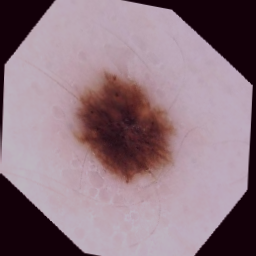

In [20]:
x2,y2 = random_transform(x,y, elastic=True)
x2 = np.array(x2, dtype=np.uint8)
Image.fromarray(x2)

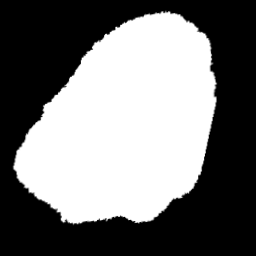

In [283]:
Image.fromarray(y2)

In [230]:
random_state = np.random.RandomState(1301)

In [235]:
random_state.uniform(-1, 1)

0.42728115119224164

In [237]:
shape = x.shape

In [5]:
def elastic_deformation(img, label, alpha=256*0.2, sigma=256*0.08, alpha_affine=256*0.08, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_ (with modifications).
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
         Convolutional Neural Networks applied to Visual Document Analysis", in
         Proc. of the International Conference on Document Analysis and
         Recognition, 2003.

     Based on https://gist.github.com/erniejunior/601cdf56d2b424757de5
    """
    if random_state is None:
        random_state = np.random.RandomState(1301)

    shape = img.shape
    shape_size = shape[:2]
    
    # Random affine
    center_square = np.float32(shape_size) // 2
    square_size = min(shape_size) // 3
    pts1 = np.float32([center_square + square_size, [center_square[0]+square_size, center_square[1]-square_size], center_square - square_size])
    pts2 = pts1 + random_state.uniform(-alpha_affine, alpha_affine, size=pts1.shape).astype(np.float32)
    M = cv2.getAffineTransform(pts1, pts2)
    img = cv2.warpAffine(img, M, shape_size[::-1])
    label = cv2.warpAffine(label, M, shape_size[::-1])
    
    # random elastic deformation
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)
    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1)), np.reshape(z, (-1, 1))

    img = map_coordinates(img, indices, order=1, mode='reflect').reshape(shape)
    label = map_coordinates(label, indices, order=1, mode='reflect').reshape(shape)
    return img, label

def random_transform(x, y, 
    rotation_range=180, shear_range=0, zoom_range=[1,1], zoom_maintain_shape=True, 
    elastic=False, channel_shift_range=20, horizontal_flip=True, vertical_flip=True,
    img_row_index=0, img_col_index=1, img_channel_index=2):

    # use composition of homographies to generate final transform that
    # needs to be applied
    if rotation_range:
        theta = np.pi / 180 * np.random.uniform(-rotation_range, rotation_range)
    else:
        theta = 0
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta), 0],
                                [0, 0, 1]])

    tx = 0
    ty = 0

    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]])
    if shear_range:
        shear = np.random.uniform(-shear_range, shear_range)
    else:
        shear = 0
    shear_matrix = np.array([[1, -np.sin(shear), 0],
                             [0, np.cos(shear), 0],
                             [0, 0, 1]])

    if zoom_range[0] == 1 and zoom_range[1] == 1:
        zx, zy = 1, 1
    else:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
    if zoom_maintain_shape:
        zy = zx
    zoom_matrix = np.array([[zx, 0, 0],
                            [0, zy, 0],
                            [0, 0, 1]])

    transform_matrix = np.dot(np.dot(np.dot(rotation_matrix, translation_matrix), shear_matrix), zoom_matrix)

    h, w = x.shape[img_row_index], x.shape[img_col_index]
    transform_matrix = transform_matrix_offset_center(transform_matrix, h, w)
    
    x = apply_transform(x, transform_matrix, img_channel_index, fill_mode='constant', cval=0)
    y = apply_transform(y, transform_matrix, img_channel_index, fill_mode='constant', cval=0)

    if elastic:
        x, y = elastic_deformation(x, y)
        
    if channel_shift_range != 0:
        x = random_channel_shift(x, channel_shift_range, img_channel_index)

    if horizontal_flip:
        if np.random.random() < 0.5:
            x = flip_axis(x, img_col_index)
            y = flip_axis(y, img_col_index)

    if vertical_flip:
        if np.random.random() < 0.5:
            x = flip_axis(x, img_row_index)
            y = flip_axis(y, img_row_index)
    print "asdf"
    return x, y